### Importación de datos



In [197]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
5,Guitarra acústica,Instrumentos musicales,298400.0,16100.0,10/09/2021,Beatriz Morales,Leticia,5,Tarjeta de crédito,3,-4.21528,-69.94056
6,Mochila,Deportes y diversión,105900.0,9000.0,10/06/2020,Blanca Ramirez,Bogotá,1,Cupón,1,4.60971,-74.08175
7,Tablet ABXY,Electrónicos,962600.0,49400.0,12/04/2022,Juliana Costa,Medellín,4,Nequi,1,6.25184,-75.56359
8,Olla de presión,Artículos para el hogar,82800.0,4800.0,11/04/2022,Izabela de León,Barranquilla,5,Nequi,1,10.96854,-74.78132
9,Cubo mágico 8x8,Juguetes,9100.0,3800.0,04/09/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [198]:
#Ingreso de tiendas
lista_ingresos = [['Tienda 1', float(tienda["Precio"].sum())], ['Tienda 2', float(tienda2["Precio"].sum())], ['Tienda 3', float(tienda3["Precio"].sum())], ['Tienda 4', float(tienda4["Precio"].sum())]]
lista_ingresos


[['Tienda 1', 1150880400.0],
 ['Tienda 2', 1116343500.0],
 ['Tienda 3', 1098019600.0],
 ['Tienda 4', 1038375700.0]]

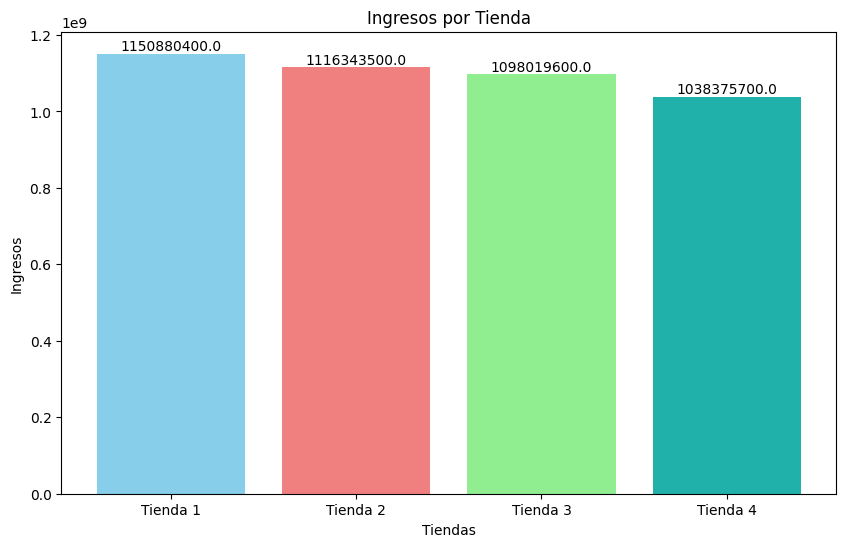

In [199]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
tiendas = [x[0] for x in lista_ingresos]
ingresos = [x[1] for x in lista_ingresos]

plt.figure(figsize=(10, 6))  # Ajustar el tamaño ddel gráfico
plt.bar(tiendas, ingresos, color=['skyblue', 'lightcoral', 'lightgreen', 'lightseagreen'])
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.title("Ingresos por Tienda")

for i, v in enumerate(ingresos):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


In [200]:
tienda_mas_ingresos = max(lista_ingresos, key=lambda x: x[1])
tienda_mas_ingresos

['Tienda 1', 1150880400.0]

In [201]:
tienda_menos_ingresos = min(lista_ingresos, key=lambda x: x[1])
tienda_menos_ingresos

['Tienda 4', 1038375700.0]

In [202]:
valores_ingresos = [sublista[1] for sublista in lista_ingresos]
valores_ingresos

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

# 2. Ventas por categoría

In [203]:
# Ventas por categoría para cada tienda
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

ventas_categoria_tienda= pd.concat([ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4], axis=1)
ventas_categoria_tienda.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

ventas_categoria_tienda = ventas_categoria_tienda.sort_values(by='Tienda 1', ascending=False)
ventas_categoria_tienda


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0


In [204]:
#Cantidad de ventas realizadas por cada tienda
cantidad_ventas_tienda1 = tienda.shape[0]
cantidad_ventas_tienda2 = tienda2.shape[0]
cantidad_ventas_tienda3 = tienda3.shape[0]
cantidad_ventas_tienda4 = tienda4.shape[0]

lista_cantidad_ventas = [['Tienda 1', cantidad_ventas_tienda1], ['Tienda 2', cantidad_ventas_tienda2], ['Tienda 3', cantidad_ventas_tienda3], ['Tienda 4', cantidad_ventas_tienda4]]
lista_cantidad_ventas

[['Tienda 1', 2359],
 ['Tienda 2', 2359],
 ['Tienda 3', 2359],
 ['Tienda 4', 2358]]

# 3. Calificación promedio de la tienda


In [205]:
calificacion_promedio = {"Tienda 1":round(float(tienda["Calificación"].mean()),6),
          "Tienda 2":round(float(tienda2["Calificación"].mean())),
          "Tienda 3":round(float(tienda3["Calificación"].mean())),
          "Tienda 4":round(float(tienda4["Calificación"].mean()))}
calificacion_promedio

lista_calificacion_promedio = list(calificacion_promedio.values())
lista_calificacion_promedio

[3.976685, 4, 4, 4]

# 4. Productos más y menos vendidos

In [206]:
producto_mas_vendido = {"Tienda 1":tienda.groupby("Producto")["Precio"].sum().idxmax(),
          "Tienda 2":tienda2.groupby("Producto")["Precio"].sum().idxmax(),
          "Tienda 3":tienda3.groupby("Producto")["Precio"].sum().idxmax(),
          "Tienda 4":tienda4.groupby("Producto")["Precio"].sum().idxmax()}
producto_mas_vendido

{'Tienda 1': 'TV LED UHD 4K',
 'Tienda 2': 'Iphone 15',
 'Tienda 3': 'Refrigerador',
 'Tienda 4': 'Iphone 15'}

In [207]:
producto_menos_vendido = {"Tienda 1":tienda.groupby("Producto")["Precio"].sum().idxmin(),
          "Tienda 2":tienda2.groupby("Producto")["Precio"].sum().idxmin(),
          "Tienda 3":tienda3.groupby("Producto")["Precio"].sum().idxmin(),
          "Tienda 4":tienda4.groupby("Producto")["Precio"].sum().idxmin()}
producto_menos_vendido

{'Tienda 1': 'Cuerda para saltar',
 'Tienda 2': 'Cubo mágico 8x8',
 'Tienda 3': 'Cubo mágico 8x8',
 'Tienda 4': 'Cuerda para saltar'}

In [208]:
import pandas as pd
def analyze_sales(df, tienda_nombre):
    producto_mas_vendido = df.groupby("Producto")["Precio"].sum().idxmax()
    precio_mas_vendido = df.groupby("Producto")["Precio"].sum().max()
    producto_menos_vendido = df.groupby("Producto")["Precio"].sum().idxmin()
    precio_menos_vendido = df.groupby("Producto")["Precio"].sum().min()

    return {
        "Producto más vendido": producto_mas_vendido,
        "Precio producto más vendido": precio_mas_vendido,
        "Producto menos vendido": producto_menos_vendido,
        "Precio producto menos vendido": precio_menos_vendido
    }

tienda_1_analysis = analyze_sales(tienda, "Tienda 1");
tienda_2_analysis = analyze_sales(tienda2, "Tienda 2");
tienda_3_analysis = analyze_sales(tienda3, "Tienda 3");
tienda_4_analysis = analyze_sales(tienda4, "Tienda 4");
tienda_data = {
    "Tienda":['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    "Producto más vendido":  [tienda_1_analysis["Producto más vendido"],          tienda_2_analysis["Producto más vendido"],          tienda_3_analysis["Producto más vendido"],          tienda_4_analysis["Producto más vendido"]],
    "Precio más vendido":    [tienda_1_analysis["Precio producto más vendido"],   tienda_2_analysis["Precio producto más vendido"],   tienda_3_analysis["Precio producto más vendido"],   tienda_4_analysis["Precio producto más vendido"]],
    "Producto menos vendido":[tienda_1_analysis["Producto menos vendido"],        tienda_2_analysis["Producto menos vendido"],        tienda_3_analysis["Producto menos vendido"],        tienda_4_analysis["Producto menos vendido"]],
    "Precio menos vendido":  [tienda_1_analysis["Precio producto menos vendido"], tienda_2_analysis["Precio producto menos vendido"], tienda_3_analysis["Precio producto menos vendido"], tienda_4_analysis["Precio producto menos vendido"]]
}
tienda_data
tienda_data_df = pd.DataFrame(tienda_data)
tienda_data_df

,Tienda,Producto más vendido,Precio más vendido,Producto menos vendido,Precio menos vendido
0,Tienda 1,TV LED UHD 4K,142150200.0,Cuerda para saltar,652800.0
1,Tienda 2,Iphone 15,113225800.0,Cubo mágico 8x8,643600.0
2,Tienda 3,Refrigerador,99889700.0,Cubo mágico 8x8,640400.0
3,Tienda 4,Iphone 15,96697500.0,Cuerda para saltar,704800.0


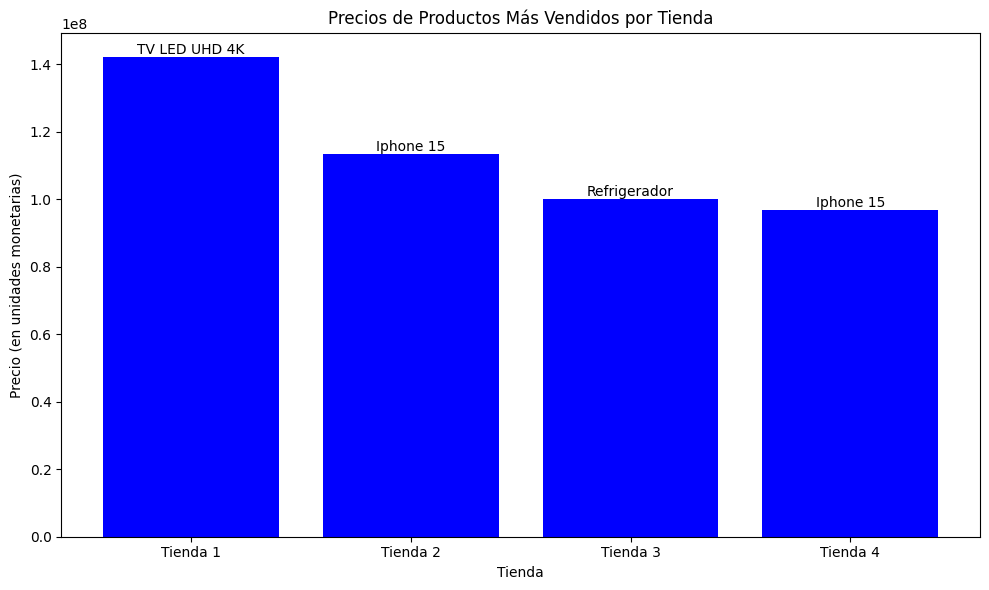

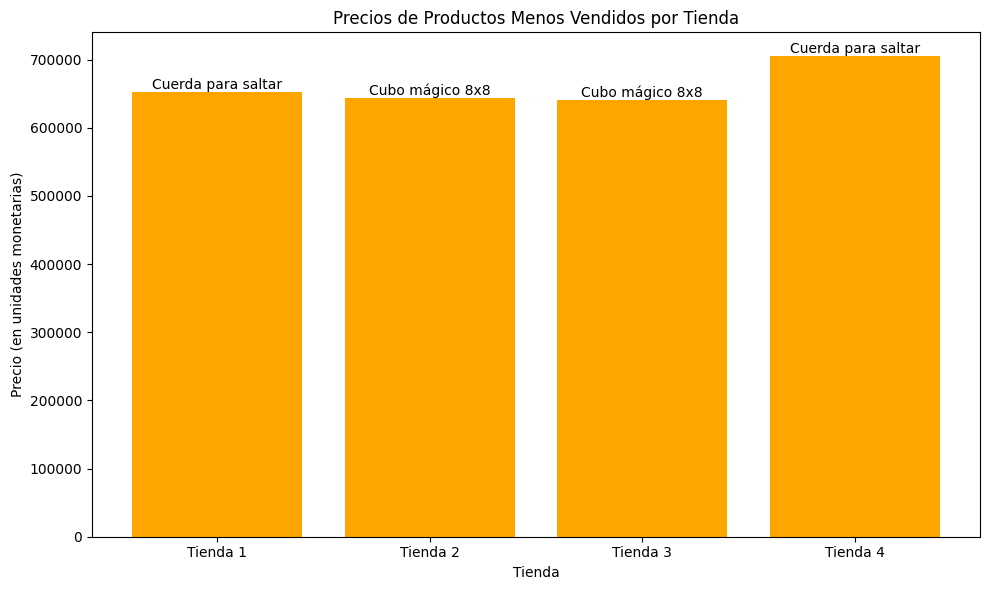

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars1 = plt.bar(tienda_data_df['Tienda'], tienda_data_df['Precio más vendido'], color='blue')

for bar, product in zip(bars1, tienda_data_df['Producto más vendido']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, product, ha='center', va='bottom')

plt.title('Precios de Productos Más Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Precio (en unidades monetarias)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Mas vendidos
plt.figure(figsize=(10, 6))
plt.bar(tienda_data_df['Tienda'], tienda_data_df['Precio menos vendido'], color='orange')
bars2 = plt.bar(tienda_data_df['Tienda'], tienda_data_df['Precio menos vendido'], color='orange')

#Menos vendidos
for bar, product in zip(bars2, tienda_data_df['Producto menos vendido']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, product, ha='center', va='bottom')
plt.title('Precios de Productos Menos Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Precio (en unidades monetarias)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

---



In [210]:
costo_envio_promedio = {"Tienda 1":round(float(tienda["Costo de envío"].mean()),4),
          "Tienda 2":round(float(tienda2["Costo de envío"].mean()),4),
          "Tienda 3":round(float(tienda3["Costo de envío"].mean()),4),
          "Tienda 4":round(float(tienda4["Costo de envío"].mean()),4)}
lista_envio_promedio = list(costo_envio_promedio.values())
costo_envio_promedio


{'Tienda 1': 26018.6096,
 'Tienda 2': 25216.2357,
 'Tienda 3': 24805.6804,
 'Tienda 4': 23459.4572}

# GRÁFICOS

---

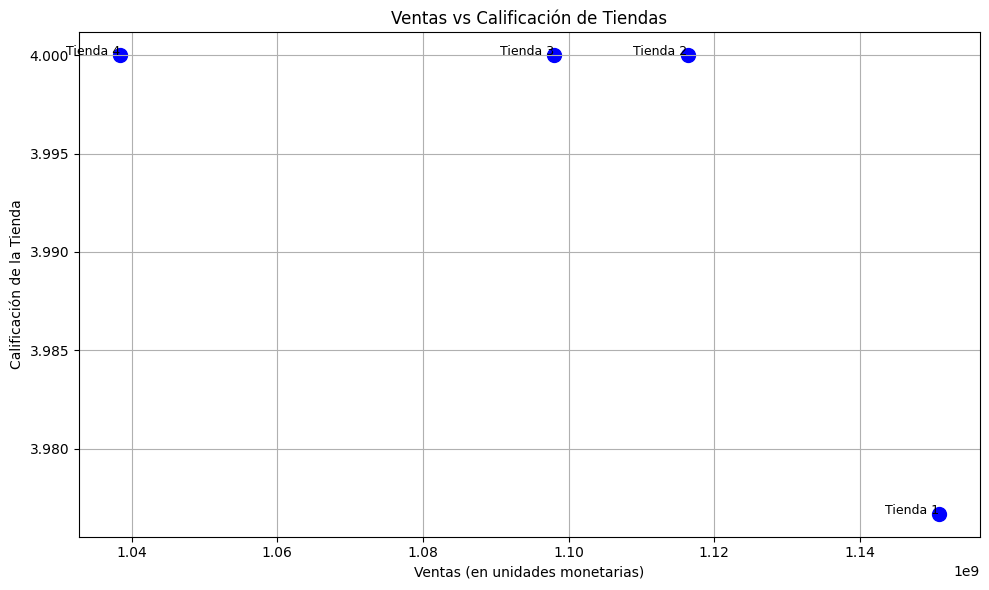

In [211]:
# Crear un DataFrame con los datos
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ventas': lista_ingresos_elemento2,
    'Calificación': lista_calificacion_promedio
}

df = pd.DataFrame(data)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Ventas'], df['Calificación'], color='blue', s=100)

# Añadir etiquetas a los puntos
for i, tienda in enumerate(df['Tienda']):
    plt.text(df['Ventas'][i], df['Calificación'][i], tienda, fontsize=9, ha='right')

# Configurar el gráfico
plt.title('Ventas vs Calificación de Tiendas')
plt.xlabel('Ventas (en unidades monetarias)')
plt.ylabel('Calificación de la Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

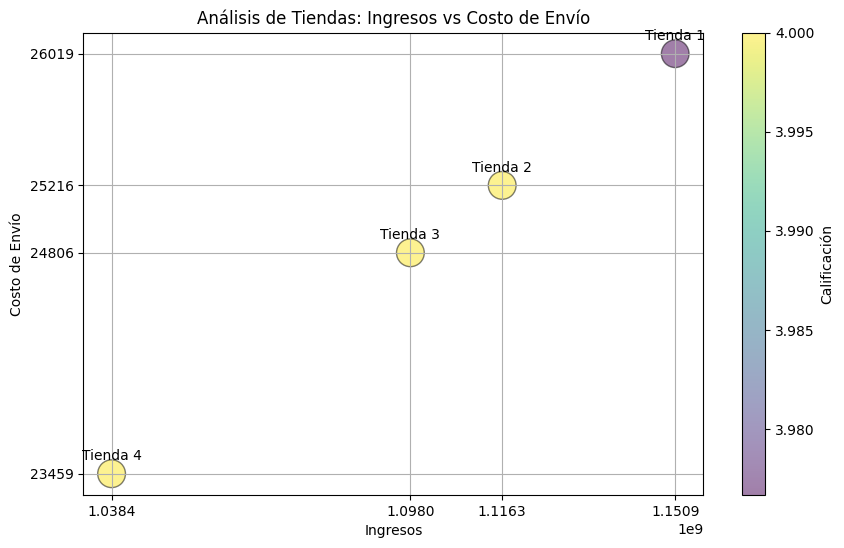

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío': lista_envio_promedio,
    'Ingresos': lista_ingresos_elemento2,
    'Calificación': lista_calificacion_promedio
}

df = pd.DataFrame(data)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Ingresos'], df['Costo de Envío'],
                      s=df['Calificación']*100,  # Tamaño de los puntos basado en la calificación
                      alpha=0.5,
                      c=df['Calificación'],  # Color de los puntos basado en la calificación
                      cmap='viridis',  # Mapa de colores
                      edgecolor='k')

# Añadir etiquetas y título
plt.title('Análisis de Tiendas: Ingresos vs Costo de Envío')
plt.xlabel('Ingresos')
plt.ylabel('Costo de Envío')
plt.xticks(df['Ingresos'])  # Marcas en el eje X
plt.yticks(df['Costo de Envío'])  # Marcas en el eje Y

# Añadir una barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Calificación')

# Añadir etiquetas a los puntos
for i, tienda in enumerate(df['Tienda']):
    plt.annotate(tienda, (df['Ingresos'][i], df['Costo de Envío'][i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Mostrar el gráfico
plt.grid()
plt.show()


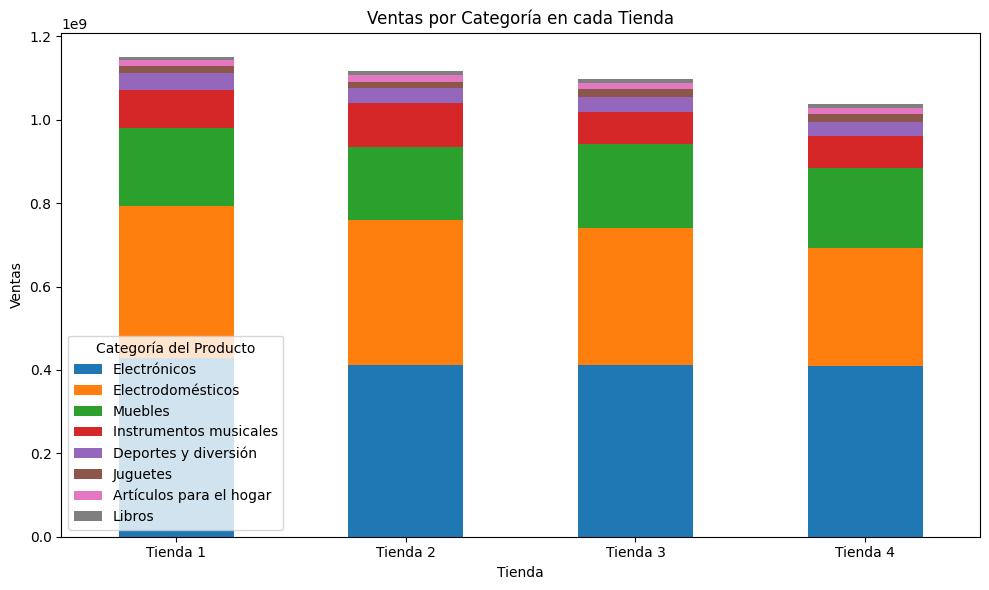

In [213]:
import matplotlib.pyplot as plt

# Transponer dataframe para gráfico
ventas_categoria_tienda_transpuesta = ventas_categoria_tienda.T

# Gráfico de barras apiladas
ventas_categoria_tienda_transpuesta.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Ventas por Categoría en cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas')
plt.xticks(rotation=0)
plt.legend(title='Categoría del Producto')  # Leyenda para las categorías
plt.tight_layout()  # Ajustar el gráfico para evitar recortes

plt.show()

# EXTRA: Ventas en función de las Coordenadas Geográficas
---

In [214]:
# Areas de mayor concentración de ventas.
import pandas as pd
!pip install folium

import folium
from folium.plugins import HeatMap

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

all_stores = pd.concat([tienda, tienda2, tienda3, tienda4])

# Mapa centrado en una ubicación promedio (puedes ajustarlo)
map_center = [all_stores['lat'].mean(), all_stores['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Lista de listas con latitud, longitud y precio para cada tienda
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in all_stores.iterrows()]

# Crea el mapa de calor
HeatMap(heat_data).add_to(m)

# Muestra el mapa
m


# EXTRA: Rendimiento por tienda
---

In [215]:
#  Rendimiento por tienda
rendimiento = {}
for tienda_name, df in zip(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], [tienda, tienda2, tienda3, tienda4]):
  ingresos = df["Precio"].sum()
  costo_envio = df["Costo de envío"].sum()
  calificacion = df["Calificación"].mean()
  rendimiento[tienda_name] = round(float((ingresos - costo_envio) / calificacion),4)

rendimiento


{'Tienda 1': 273972539.9744,
 'Tienda 2': 261773305.9219,
 'Tienda 3': 256773568.2723,
 'Tienda 4': 246025416.1961}

# **Informe Final de Análisis de Tiendas**
# Introducción
El presente informe tiene como finalidad evaluar el rendimiento de cuatro tiendas pertenecientes al Sr. Juan, para determinar cuál de ellas debería ser vendida y hacer las recomendaciones necesarias. Para ello, se han considerado diversos factores. Este análisis se apoya en datos cuantitativos y visualizaciones generadas para facilitar la comprensión de los hallazgos.

#Análisis de Datos
##Ingresos Totales
Los ingresos de cada tienda son los siguientes:

Tienda 1: 1150880400.0

Tienda 2: 1116343500.0

Tienda 3: 1098019600.0

Tienda 4: 1038375700.0

##Categorías de Productos
Las categorías de productos más y menos vendidas son:

Más Vendidas:

*  Electrónicos
*  Electrodomésticos

Menos Vendidas:
* Artículos para el hogar
* Libros

Los productos más vendidos son los electrónicos y electrodomésticos, mientras que los menos vendidos son los artículos para el hogar y los libros. Esto indica que las tiendas tienen un **enfoque fuerte en productos de alta demanda**.

##Calificaciones Promedio de Clientes

* Tienda 1: 3.98
* Tienda 2: 4.00
* Tienda 3: 4.00
* Tienda 4: 4.00


##Costos de Envío Promedio
Los costos de envío promedio para cada tienda son:

* Tienda 1: 26018.61
* Tienda 2: 25216.24
* Tienda 3: 24805.68
* Tienda 4: 23459.46


# Conclusiones

Segun los datos analizados podemos decir que:
* La Tienda 1 tiene el ingreso total más alto, pero también el costo de envío más elevado y la calificación promedio más baja.
* Las Tiendas 2 y 3 tienen calificaciones promedio de 4.00, lo que indica una buena satisfacción del cliente, aunque sus ingresos son inferiores a los de Tienda 1.
* Tienda 4 presenta el ingreso total más bajo y, aunque tiene una buena calificación promedio, su rentabilidad neta es la más baja debido a los costos de envío.

Ver gráfico **Análisis de Tiendas: Ingresos vs Costo de Envío**

# Recomendación
Con base en el análisis realizado, se recomienda que el Sr. Juan considere vender Tienda 4. A pesar de tener una calificación promedio aceptable, su rendimiento de la sección [EXTRA: Rendimiento por tienda] en términos de ingresos es el más bajo y su rentabilidad neta es la más débil. Además, los costos de envío son los más bajos, lo que podría ser atractivo para un comprador, pero no compensan la baja en ingresos.

La decisión de vender Tienda 4 se justifica por su menor rendimiento general en comparación con las otras tiendas, lo que sugiere que podría ser la opción menos viable para mantener en el portafolio del Sr. Juan.
Se recomienda al Sr Juan crear una estrategia para retener a los clientes de la tienda 4 y ofrece promociones especiales o descuentos en los productos mas vendidos de la tienda 4 en las otras tiendas, para incentivar a los clientes a seguir comprando en las tiendas restantes.
